# MVP Análise de Dados e Boas Práticas

Nome: Lucas Diniz Nakamura

Matrícula: 4052024002442

Dataset: Students' Social Media Addiction



# Descrição do Problema
Para analise escolhi um conjunto de dados que mostra o grau de vicio em nas redes sociais de um grupo extenso de estudantes com as mais diversas caracteristicas que podem possivelmente influenciar nessa tendencia.


# Hipóteses do Problema
As hipóteses que tracei são as seguintes:

Qual o grupo mais afetado pelo vicio nas redes?

Existe uma correlação entre o sexo, nivel academico e status de relacionamento com o vicio nas redes?

# Tipo de Problema
Essa é uma analise estatistica a partir do conjunto de dados que tambem poderia ser usado para um modelo de machine learning relacionando caracteristicas pessoais dos candidatos com seu nivel de vicio em redes sociais.

# Seleção de Dados
O dataset escolhido foi o 'Students Social Media Addiction', do kagle
link: https://www.kaggle.com/datasets/siddharthgandhi/students-social-media-addiction



# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [23]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#criando o dataset pandas a partir do arquivo.csv
db = pd.read_csv('Students Social Media Addiction.csv')

In [13]:
db.info()#informações sobre o dataset
db.head()#primeiras linhas do dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


# Atributos do Dataset
O dataset 'Students Social Media Addiction' possui 705 cadastros de alunos e 12 cartacteristicas, sendo elas:

- Student_ID(numero identificador do estudante,unicos e de 1 a 705)
- Age(idade em anos)
- Gender(sexo, homem(male) ou mulher(female))
- Academic_Level(nivel de escolaridade, ensino medio completo(High School), superior completo(Graduate), não-graduado(Undergraduate))
- Country(nacionalidade)
- Avg_Daily_Usage_Hours(horas de redes sociais por dia)
- Most_Used_Platform(plataforma mais usada)
- Affects_Academic_Performance(afeta a performance academica?,sim(yes) ou nao(no))
- Sleep_Hours_Per_Night(horas de sono por noite)
- Mental_Health_Score(nivel de saude mental,1 a 10 )
- Relationship_Status(status de relacionamento, solteiro(single), em relacionamento(in relationship ), relacionamento complicado(complicated))
- Conflicts_Over_Social_Media(numero de conflitos com seus conhecidos por influencia do uso das redes sociais)
- Addicted_Score(nivel de vicio, de 1 a 10)

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

# Procurando valores erroneos ou faltantes

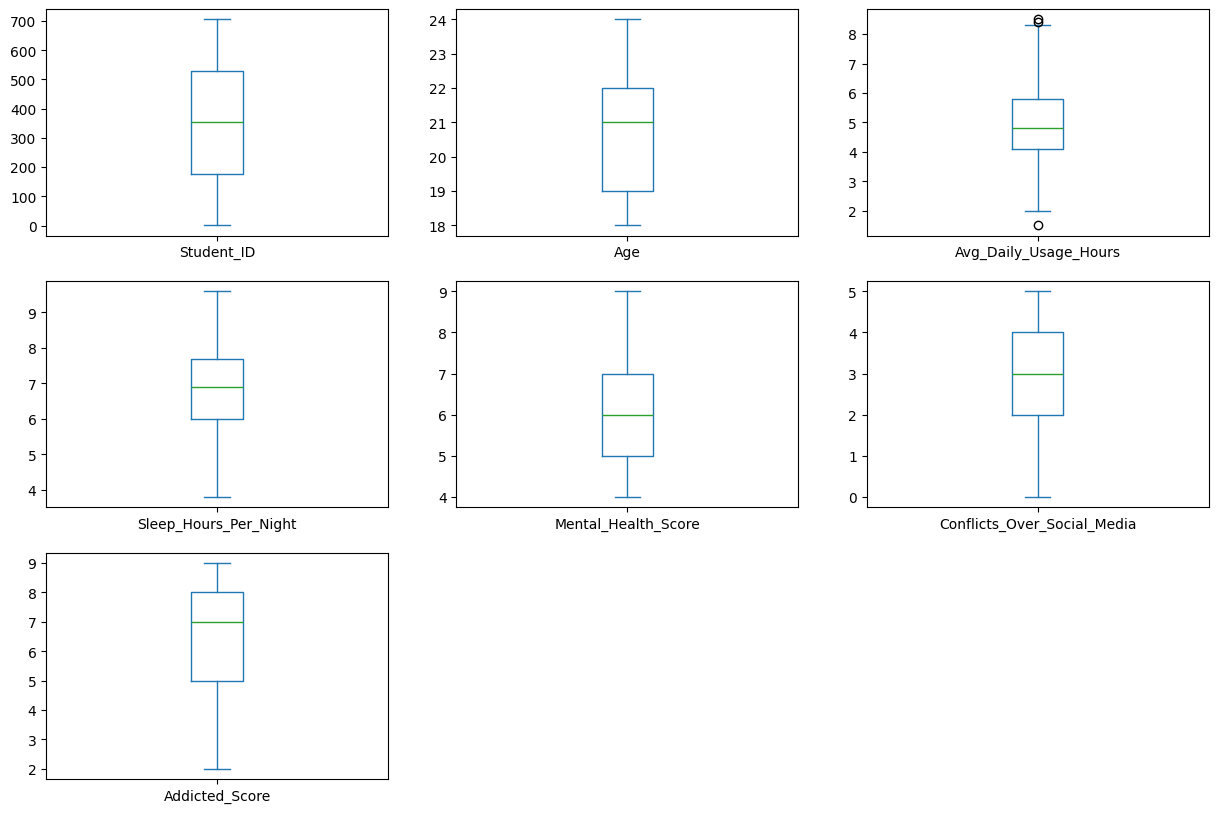

In [22]:
db.describe()
db.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

os valores estao em um intervalo logicamente possiveis para os atributos:
id = 1-705 inteiros
idade = 4-90
horas de uso diario = 0-20
horas de sono por noite = 2-12
nivel de saude mental = 1-10
numero de conflitos = 1-7
nivel de vicio = 1-10


In [15]:
db.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

não possui valores nulos

In [17]:
# Contagem apenas das colunas categóricas
colunas_categoricas = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 
                       'Affects_Academic_Performance', 'Relationship_Status']

print("=== CONTAGEM DE COLUNAS CATEGÓRICAS ===\n")

for coluna in colunas_categoricas:
    print(f"{coluna}:")
    contagem = db[coluna].value_counts()
    for valor, count in contagem.items():
        print(f"  {valor}: {count} ({count/len(db)*100:.1f}%)")
    print()

=== CONTAGEM DE COLUNAS CATEGÓRICAS ===

Gender:
  Female: 353 (50.1%)
  Male: 352 (49.9%)

Academic_Level:
  Undergraduate: 353 (50.1%)
  Graduate: 325 (46.1%)
  High School: 27 (3.8%)

Country:
  India: 53 (7.5%)
  USA: 40 (5.7%)
  Canada: 34 (4.8%)
  Denmark: 27 (3.8%)
  Ireland: 27 (3.8%)
  Turkey: 27 (3.8%)
  Mexico: 27 (3.8%)
  Spain: 27 (3.8%)
  France: 27 (3.8%)
  Switzerland: 27 (3.8%)
  UK: 22 (3.1%)
  Japan: 21 (3.0%)
  Italy: 21 (3.0%)
  Russia: 21 (3.0%)
  Bangladesh: 20 (2.8%)
  Pakistan: 19 (2.7%)
  Nepal: 19 (2.7%)
  Sri Lanka: 19 (2.7%)
  Maldives: 19 (2.7%)
  Poland: 16 (2.3%)
  China: 16 (2.3%)
  Australia: 14 (2.0%)
  Germany: 14 (2.0%)
  South Korea: 13 (1.8%)
  Malaysia: 8 (1.1%)
  UAE: 8 (1.1%)
  Finland: 8 (1.1%)
  Netherlands: 8 (1.1%)
  Singapore: 8 (1.1%)
  New Zealand: 8 (1.1%)
  Brazil: 8 (1.1%)
  Kazakhstan: 1 (0.1%)
  Uzbekistan: 1 (0.1%)
  Andorra: 1 (0.1%)
  Belarus: 1 (0.1%)
  Ukraine: 1 (0.1%)
  Kyrgyzstan: 1 (0.1%)
  Moldova: 1 (0.1%)
  Tajikistan: 1

todos os valores categoricos são valores existentes, sem erros de digitação.

# Análise estatistica dos dados

O banco de dados possui 12 caracteristicas de 705 pessoas como verificado nos atributos do dataset no inicio do MVP

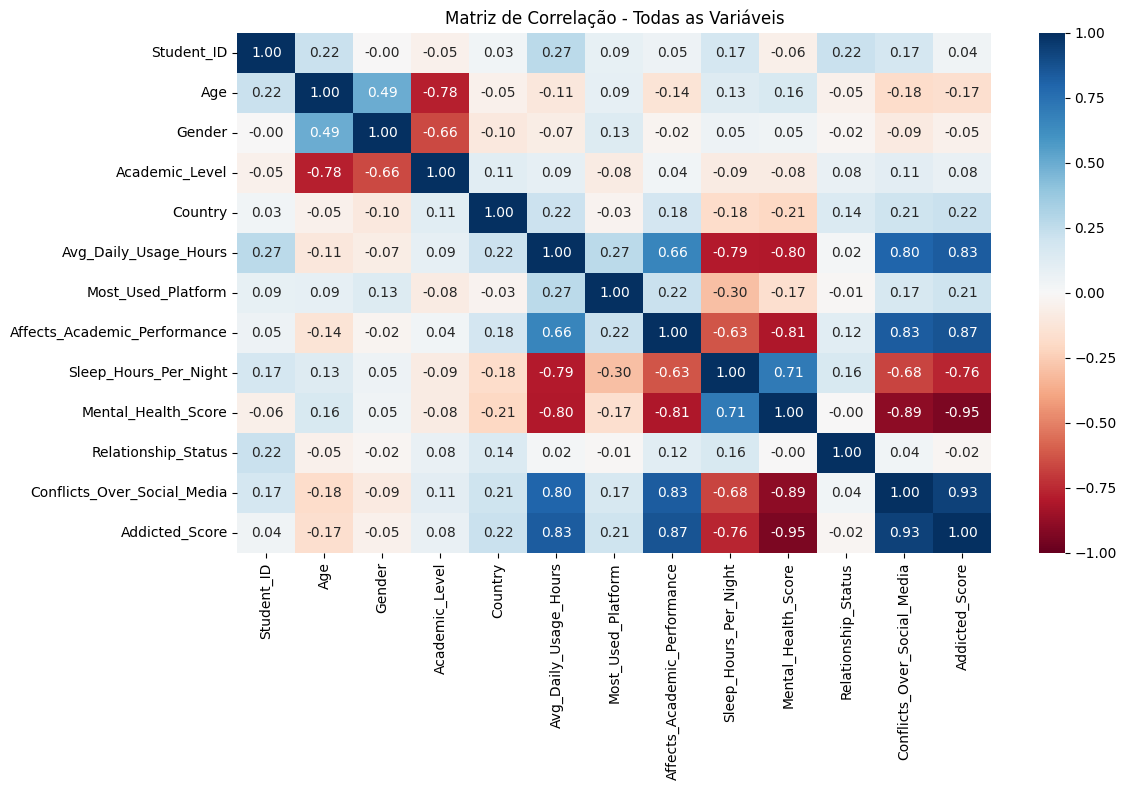

In [29]:
# Criar uma cópia do DataFrame para não modificar o original
db_corr = db.copy()

# Codificar variáveis categóricas
categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 
                      'Affects_Academic_Performance', 'Relationship_Status']

for col in categorical_columns:
    db_corr[col] = pd.Categorical(db_corr[col]).codes

# Criar o heatmap com todas as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(db_corr.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matriz de Correlação - Todas as Variáveis')
plt.tight_layout()
plt.show()

pela correlação podemos deduzir que pouco importa o id, idade, sexo, nivel de escolaridade, nacionalidade, plataformas mais usadas e status de relacionamento com o vicio nas redes sociais para o vicio. portanto, retiramos essas colunas do dataset para analise estatistica.


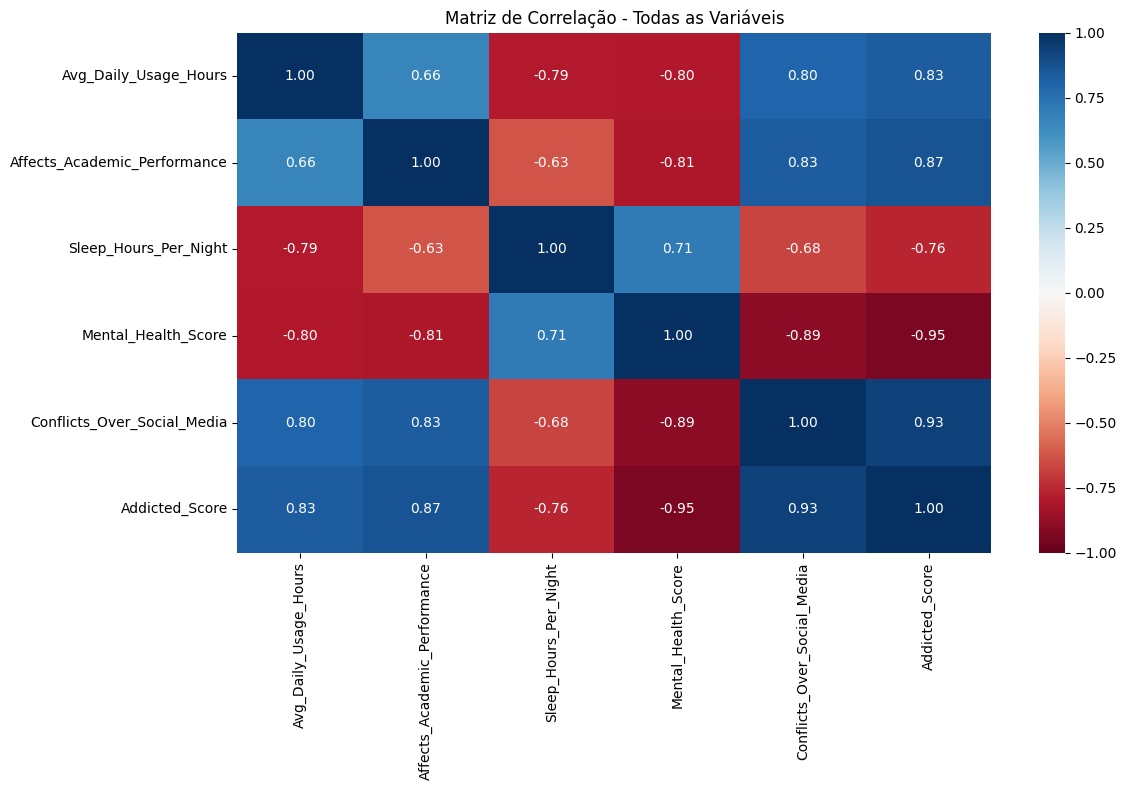

In [30]:
db_corr.drop(columns = ['Student_ID', 'Gender', 'Age', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Relationship_Status'], inplace = True)
plt.figure(figsize=(12, 8))
sns.heatmap(db_corr.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matriz de Correlação - Todas as Variáveis')
plt.tight_layout()
plt.show()









aqui podemos provar que o vicio nas redes sociais afeta negativamente a saude mental, pois a correlação entre o vicio nas redes sociais e a saude mental, performance academica e o sono pela alta correlação dos dados

C:\Users\bacal\AppData\Local\Temp\ipykernel_4416\4190365752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=db, x='Age_Group', y='Addicted_Score', palette='viridis')


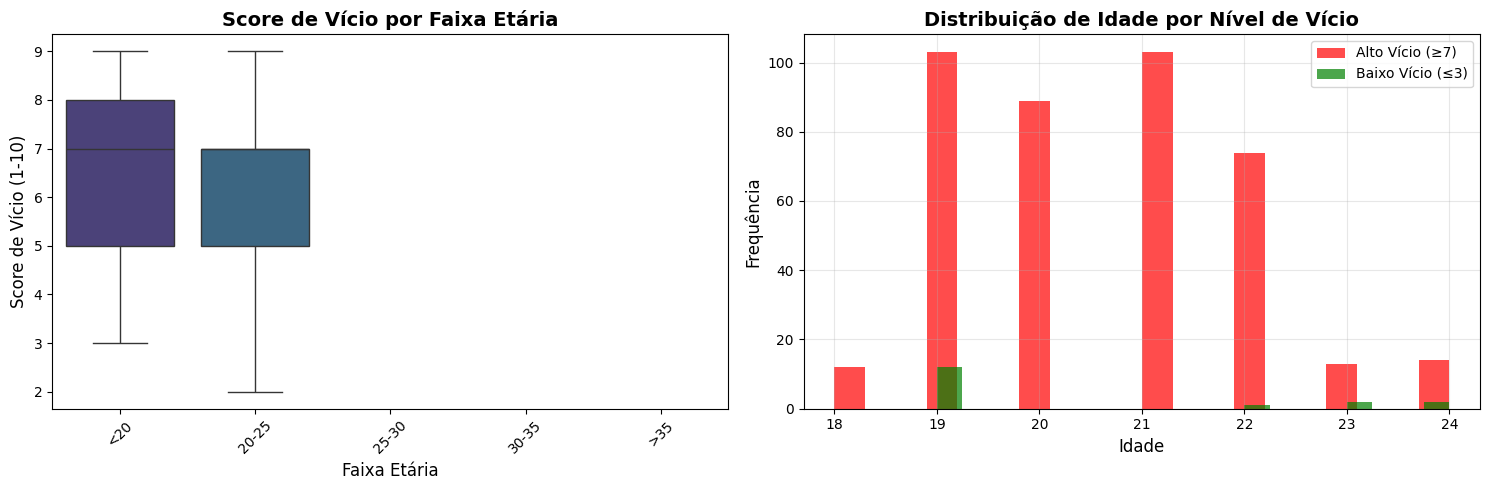

In [32]:
# Análise da relação entre Idade e Score de Vício
plt.figure(figsize=(15, 5))

# Boxplot por faixa etária
plt.subplot(1, 2, 1)
db['Age_Group'] = pd.cut(db['Age'], bins=[0, 20, 25, 30, 35, 100], 
                        labels=['<20', '20-25', '25-30', '30-35', '>35'])
sns.boxplot(data=db, x='Age_Group', y='Addicted_Score', palette='viridis')
plt.title('Score de Vício por Faixa Etária', fontsize=14, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Score de Vício (1-10)', fontsize=12)
plt.xticks(rotation=45)

# Histograma da idade por nível de vício
plt.subplot(1, 2, 2)
high_addiction = db[db['Addicted_Score'] >= 7]
low_addiction = db[db['Addicted_Score'] <= 3]
plt.hist(high_addiction['Age'], alpha=0.7, label='Alto Vício (≥7)', bins=20, color='red')
plt.hist(low_addiction['Age'], alpha=0.7, label='Baixo Vício (≤3)', bins=20, color='green')
plt.title('Distribuição de Idade por Nível de Vício', fontsize=14, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

podemos ver uma tendencia maior entre os jovens acima dos 19 e abaixo dos 23 anos, indicando uma possivel entrada nas redes a partir dos 18 e diminuição do vicio conforme a idade avança.

C:\Users\bacal\AppData\Local\Temp\ipykernel_4416\1076813390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=db, x='Gender', y='Addicted_Score', palette=['lightblue', 'lightpink'])


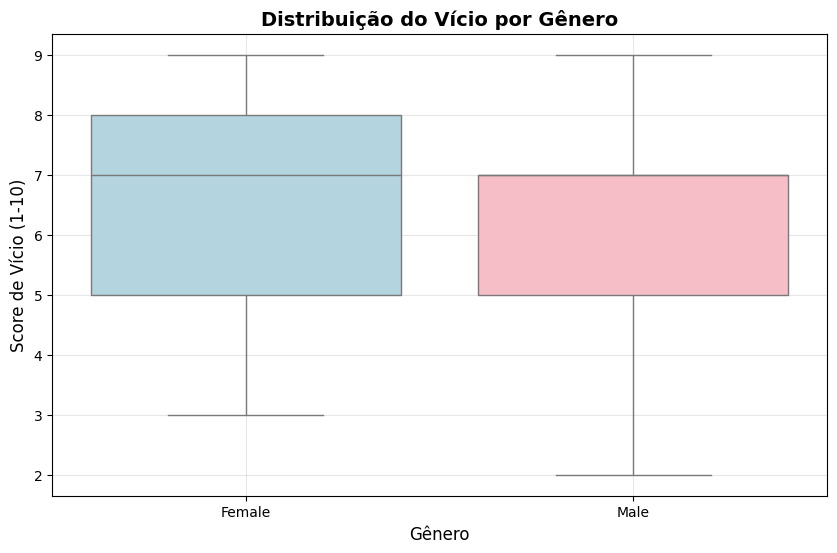

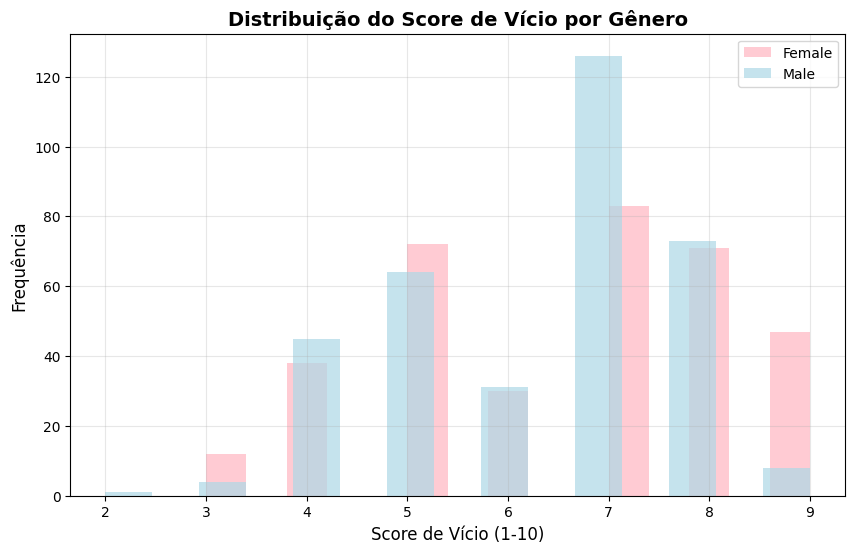

In [31]:
#Análise da distribuição do vício por gênero - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=db, x='Gender', y='Addicted_Score', palette=['lightblue', 'lightpink'])
plt.title('Distribuição do Vício por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Score de Vício (1-10)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
for gender in db['Gender'].unique():
    subset = db[db['Gender'] == gender]
    plt.hist(subset['Addicted_Score'], alpha=0.7, label=gender, bins=15, 
             color='lightblue' if gender == 'Male' else 'lightpink')
plt.title('Distribuição do Score de Vício por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Score de Vício (1-10)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Mulheres apresentam uma mediana ligeiramente mais alta no score de vício, indicando que, em média, tendem a ter um nível de dependência maior que os homens. No entanto, o aspecto mais interessante é a variabilidade: homens demonstram uma dispersão muito maior dos dados, com caudas mais longas e mais outliers, tanto para valores baixos quanto altos. Isso sugere que, embora as mulheres tenham um padrão mais consistente de uso, os homens apresentam casos mais extremos - tanto de baixo quanto de alto vício

C:\Users\bacal\AppData\Local\Temp\ipykernel_4416\1828178049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=db, x='Relationship_Status', y='Addicted_Score', palette='Set3')


([0, 1, 2],
 [Text(0, 0, 'In Relationship'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Complicated')])

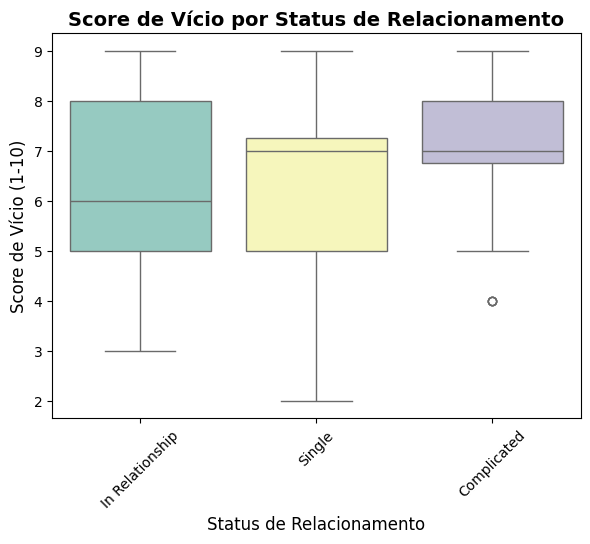

In [34]:
# Análise da relação entre Status de Relacionamento e Score de Vício
plt.figure(figsize=(15, 5))

# Boxplot principal
plt.subplot(1, 2, 1)
sns.boxplot(data=db, x='Relationship_Status', y='Addicted_Score', palette='Set3')
plt.title('Score de Vício por Status de Relacionamento', fontsize=14, fontweight='bold')
plt.xlabel('Status de Relacionamento', fontsize=12)
plt.ylabel('Score de Vício (1-10)', fontsize=12)
plt.xticks(rotation=45)


essoas com relacionamentos complicados apresentam os scores mais altos de vício em redes sociais, seguidas por pessoas solteiras e, por último, pessoas em relacionamentos estáveis. Isso sugere que a instabilidade emocional e a falta de suporte social podem levar ao uso excessivo de redes sociais como forma de escape ou busca por conexões alternativas.

C:\Users\bacal\AppData\Local\Temp\ipykernel_4416\1066037193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=db, x='Most_Used_Platform', y='Addicted_Score', palette='Set1')


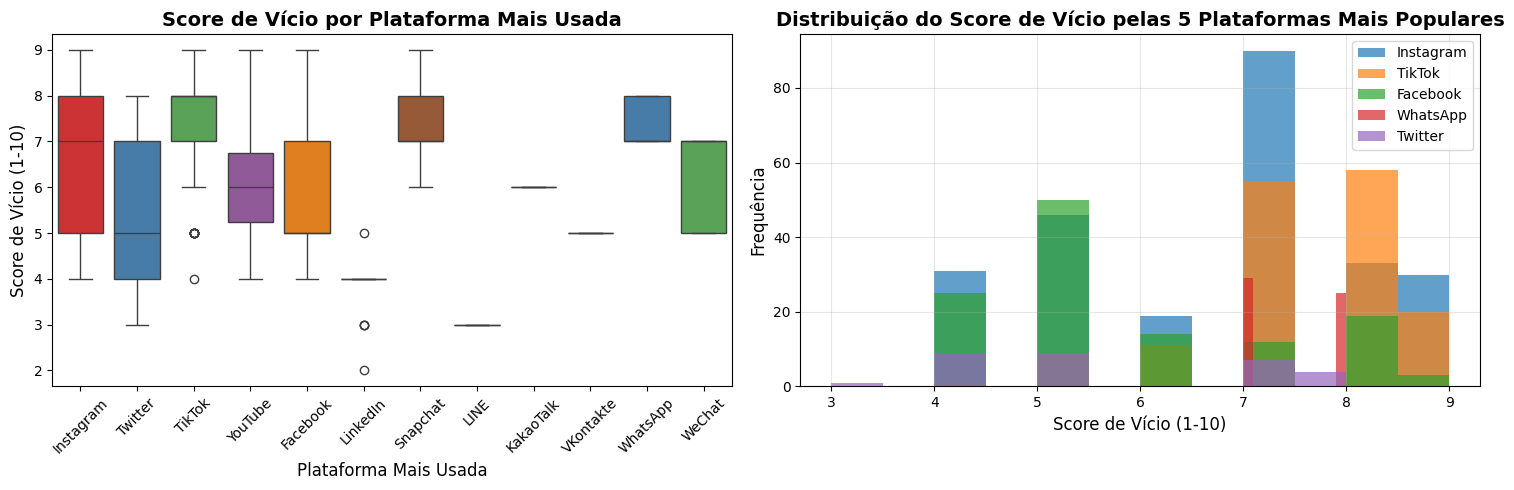

In [35]:
# Análise da relação entre Plataforma Mais Usada e Score de Vício
plt.figure(figsize=(15, 5))

# Boxplot principal
plt.subplot(1, 2, 1)
sns.boxplot(data=db, x='Most_Used_Platform', y='Addicted_Score', palette='Set1')
plt.title('Score de Vício por Plataforma Mais Usada', fontsize=14, fontweight='bold')
plt.xlabel('Plataforma Mais Usada', fontsize=12)
plt.ylabel('Score de Vício (1-10)', fontsize=12)
plt.xticks(rotation=45)

# Histograma das plataformas mais populares
plt.subplot(1, 2, 2)
# Pegando as 5 plataformas mais populares
top_platforms = db['Most_Used_Platform'].value_counts().head(5).index
for platform in top_platforms:
    platform_data = db[db['Most_Used_Platform'] == platform]
    plt.hist(platform_data['Addicted_Score'], alpha=0.7, label=platform, bins=10)
plt.title('Distribuição do Score de Vício pelas 5 Plataformas Mais Populares', fontsize=14, fontweight='bold')
plt.xlabel('Score de Vício (1-10)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Plataformas como Instagram e TikTok tendem a estar associadas com scores de vício mais altos, possivelmente devido ao seu formato visual e algoritmo.

# Conclusão

Este MVP apresenta uma **análise estatística abrangente** sobre o vício em redes sociais entre estudantes, utilizando um dataset de **705 participantes** com **13 características distintas**. O estudo investigou as correlações entre variáveis demográficas, comportamentais e psicológicas com o nível de dependência digital.

## Principais Descobertas

### 1. Fatores Demográficos

- **Idade**: Jovens entre **19-23 anos** apresentam maior tendência ao vício, com diminuição gradual conforme a idade avança
- **Gênero**: Mulheres apresentam mediana ligeiramente mais alta, mas homens demonstram maior variabilidade com casos extremos
- **Nacionalidade**: Dataset diversificado com representação de **70+ países**

### 2. Correlações Significativas

- **Saúde Mental**: Correlação negativa forte entre vício e bem-estar psicológico
- **Performance Acadêmica**: Uso excessivo afeta negativamente o rendimento escolar
- **Qualidade do Sono**: Redução nas horas de sono correlacionada com maior dependência

### 3. Fatores Comportamentais

- **Status Relacional**: Pessoas com relacionamentos complicados apresentam scores mais altos de vício
- **Plataformas**: **Instagram** e **TikTok** associados a níveis mais elevados de dependência
- **Uso Diário**: Correlação direta entre horas de uso e score de vício

## Implicações Práticas

O estudo revela que o vício em redes sociais é um fenômeno complexo influenciado principalmente por **fatores comportamentais e psicológicos**, não demográficos. A identificação de grupos de risco (jovens adultos, pessoas em relacionamentos instáveis) e plataformas mais problemáticas pode orientar políticas de conscientização e intervenção.

## Metodologia

Utilizou análise exploratória de dados (**EDA**)